<h3>Import the required packages</h3>

In [1]:
# for the Basic Operation

import pandas as pd
import numpy as np

# for the Text Preprocessing & Cleaning

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split # Split Data into training and testing set 

# for the performance metrix

from sklearn.metrics import classification_report , confusion_matrix , accuracy_score  

# Data visulaization part for the EDA

import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
 
warnings.filterwarnings('ignore')
%matplotlib inline


<h3>Data Collection And Preprocessing</h3>

In [2]:
# Loading the data form CSV file to the Pandas framework
df1 = pd.read_csv('D:\Final Year\Applied AI\Coursework\CW 01\Tweets.csv')

In [3]:
# Check the first five entries
df1.head(5)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Check the last five entries
df1.tail(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [5]:
# obtain the number of rows and columns of the dataframe
print("Shape of the dataframe is : \n",df1.shape)

Shape of the dataframe is : 
 (14640, 15)


In [6]:
#  Check the columns of the dataset
print("Columns of the dataset are : \n", df1.columns)


Columns of the dataset are : 
 Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')


In [7]:
# Check the information about the dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [8]:
# check the no of unique values in each column
print("No of Unique values in each column : \n", df1.nunique())


No of Unique values in each column : 
 tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64


In [9]:
# Check the no of null values in each column. In here, we can use both isna() or isnull() functions in Pandas

print ("No of null values in each column : \n", df1.isna().sum())

No of null values in each column : 
 tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


In [10]:
# check the no of null values in each column as a percentage

((df1.isna()).sum() * 100 / df1.index.size).round(2)

tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

In [11]:
# In here, the three columns such as airline_sentiment_gold,negativereason_gold and tweet_coord contains more than 90% of missing data.
# This will not provide any constructive information.Therefore, I need to delete these three columns.

del df1['airline_sentiment_gold']
del df1['negativereason_gold']
del df1['tweet_coord']

# Check the first five entries
df1.head()

# check the shape of the dataset
# df1.shape



,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<h3>Explotary Data Analysis (EDA)</h3>

This approach is used to summerize the characteristics of the dataset by analysing it, often with visualiztion methods

Count of the sentiment type : 

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


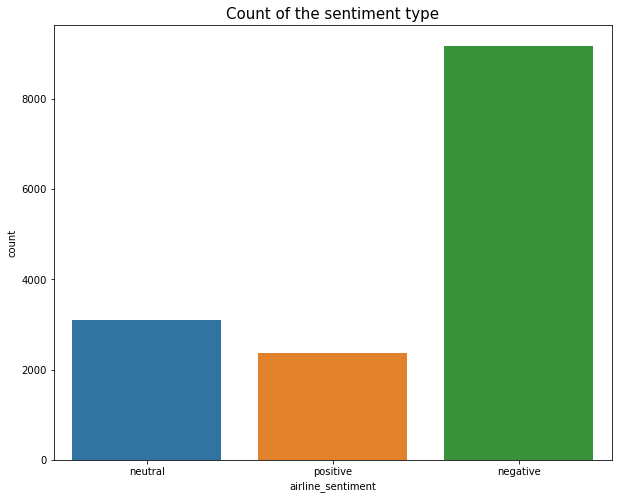

In [12]:
# check the sentiment distribution of the datset

print("Count of the sentiment type : \n")
print(df1.airline_sentiment.value_counts())

plt.figure(figsize = (10, 8))
graph = sns.countplot(x = 'airline_sentiment', data = df1)
graph.set_title(label = 'Count of the sentiment type', fontsize = 15)
plt.show()

Total number of tweets for each airline :

airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64


Text(0, 0.5, 'No.of Tweets')

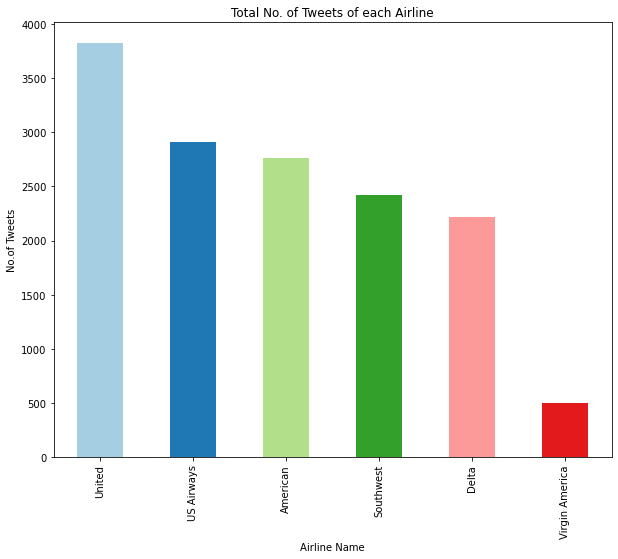

In [13]:
# check the total no of tweets for each air line 

print("Total number of tweets for each airline :\n",)
print(df1.groupby ('airline')['airline_sentiment'].count())

custom_palette =sns.color_palette('Paired',6)
pd.Series(df1['airline']).value_counts().plot(kind="bar",fontsize=10,color=custom_palette ,figsize=(10,8),title='Total No. of Tweets of each Airline')
plt.xlabel('Airline Name')
plt.ylabel('No.of Tweets')

Total number of the sentiment tweets for each airline :

 American : 
 negative    1960
neutral      463
positive     336
Name: airline_sentiment, dtype: int64

 Delta : 
 negative    955
neutral     723
positive    544
Name: airline_sentiment, dtype: int64

 Southwest : 
 negative    1186
neutral      664
positive     570
Name: airline_sentiment, dtype: int64

 United : 
 negative    2633
neutral      697
positive     492
Name: airline_sentiment, dtype: int64

 US Airways : 
 negative    2263
neutral      381
positive     269
Name: airline_sentiment, dtype: int64

 Virgin America : 
 negative    181
neutral     171
positive    152
Name: airline_sentiment, dtype: int64


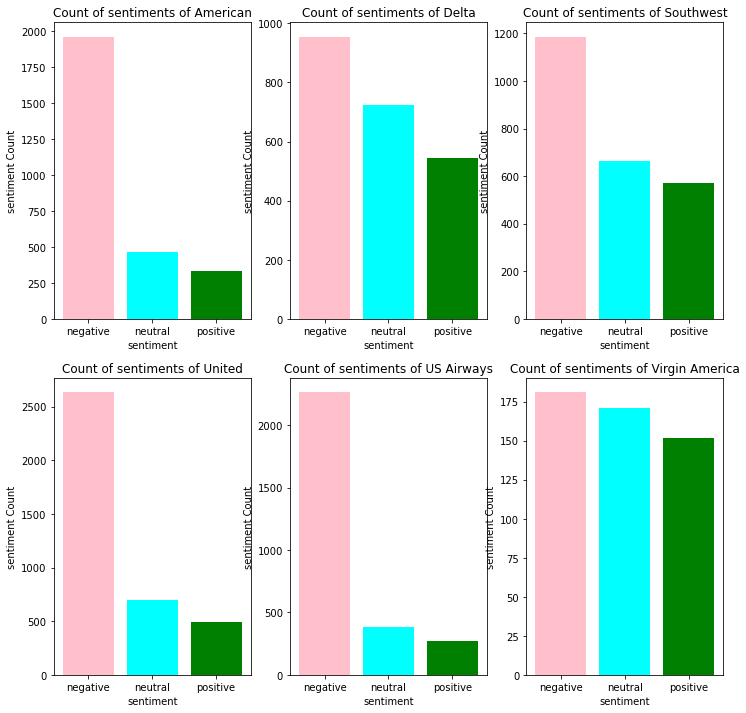

In [14]:
print("Total number of the sentiment tweets for each airline :")
airlines= ['American','Delta','Southwest','United','US Airways','Virgin America']
for i in airlines :
    print('\n {} : \n'.format(i),df1.loc[df1.airline == i].airline_sentiment.value_counts())
    
fig, axs = plt.subplots(2, 3, figsize=(12, 12))
for i, airline in enumerate(airlines):
    new_df = df1[df1['airline'] == airline]
    count = new_df['airline_sentiment'].value_counts()
    axs[i//3, i%3].bar(['negative', 'neutral', 'positive'], count, color=['pink', 'cyan', 'green'])
    axs[i//3, i%3].set_title('Count of sentiments of ' + airline)
    axs[i//3, i%3].set_ylabel('sentiment Count')
    axs[i//3, i%3].set_xlabel('sentiment')

plt.show()

According to the above visualizations, we can see that the negative reviews of each Airlines got the highest values among the other sentiments. Let's explore more information about the negative tweets.

Reasons for the Negative Tweets :

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


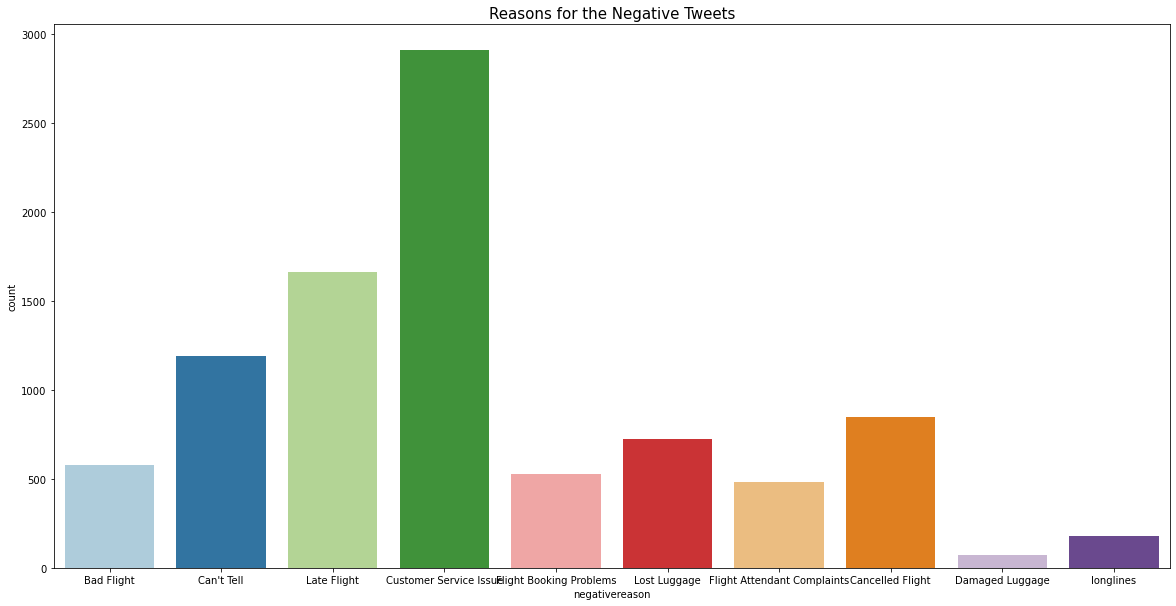

In [15]:
#Check the reasons for the negative tweets.
print('Reasons for the Negative Tweets :\n')
print(df1.negativereason.value_counts())

plt.figure(figsize = (20, 10))
sns.countplot(x = 'negativereason', data = df1, palette = 'Paired')
plt.title('Reasons for the Negative Tweets', fontsize = 15)
plt.show()

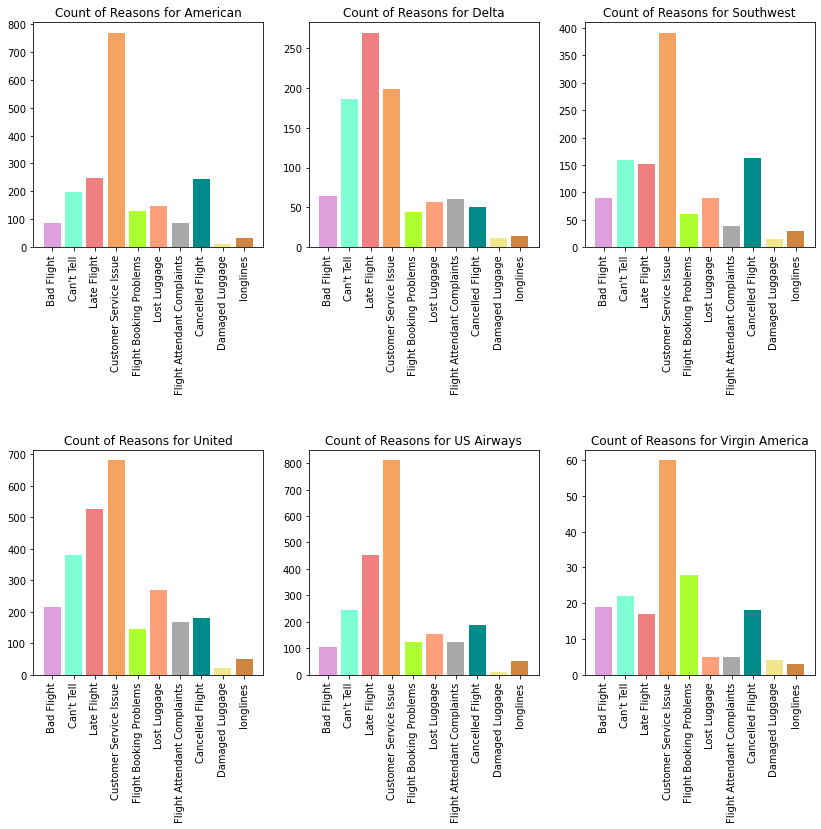

In [16]:
# check the reasons for negative tweets for each airline

negative_count =df1['negativereason'].value_counts()
def NCount(Airline):
    airlineName =df1[df1['airline']==Airline]
    count= airlineName['negativereason'].value_counts()
    Unique_reason= df1['negativereason'].unique()
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def Plot_Reason(airline):
    air = NCount(airline)
    count=air['count']
    Id = range(1,(len(air)+1))
    plt.bar(Id,count, color=['plum','aquamarine','lightcoral','sandybrown','greenyellow','lightsalmon','darkgray','darkcyan','khaki','peru'])
    plt.xticks(Id,air['Reasons'],rotation = 90)
    plt.title('Count of Reasons for '+ airline)
    
plt.figure(2,figsize=(14, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    Plot_Reason(i)

Late flight is the most common reason for negative tweets in Delta airlines.
The most common reason for Virgin America, US Airways, United,Southwest and American Airlines is the customer service issue.
Out of the six airlines, virgin america got the least no of reasons.

<h3>Most used words in the positive and negative tweets</h3>

Wordcloud can be used to visuliaze the NLP data.The frequency of a word in our text data matches with word size in the wordcloud image. If the word size in the wordcloud is large, it means that the word has high frequency in the text data.

In [17]:
from wordcloud import WordCloud,STOPWORDS

<b>Generate the wordcloud image for the positive tweets<b>

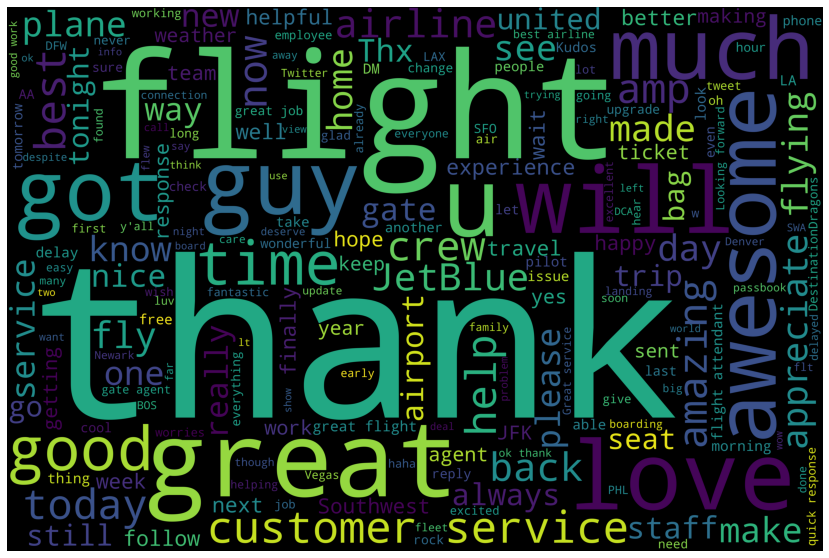

In [18]:
df1_new = df1.loc[df1['airline_sentiment'] == 'positive']
wordset = ' '.join(df1_new['text'])
processed_word = " ".join([word for word in wordset.split()
                            if 'http' not in word
                                and word != 'RT'   #retweet
                                and not word.startswith('@')                               
                            ])

wordcloud_image = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=6000,
                      height=4000
                     ).generate(processed_word)

plt.figure(1,figsize=(20, 10))
plt.imshow(wordcloud_image)
plt.axis('off')
plt.show()

<b>Generate the wordcloud image for the negative tweets</b>

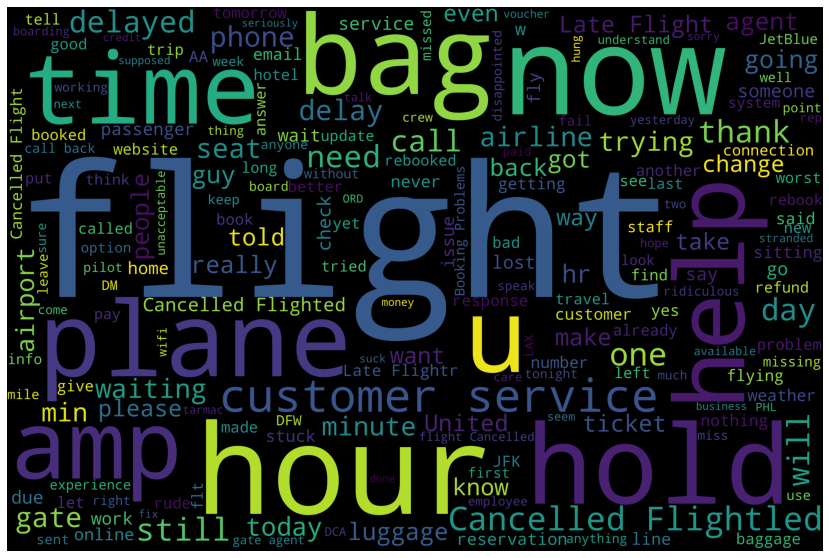

In [19]:
df1_new = df1.loc[df1['airline_sentiment'] == 'negative']
wordset = ' '.join(df1_new['text'])
processed_word = " ".join([word for word in wordset.split()
                            if 'http' not in word
                                and word != 'RT'   #retweet
                                and not word.startswith('@')                               
                            ])

wordcloud_image = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=6000,
                      height=4000
                     ).generate(processed_word)

plt.figure(1,figsize=(20, 10))
plt.imshow(wordcloud_image)
plt.axis('off')
plt.show()

Deleting the rows with neural sentiments using drop function

In [20]:
df1 = df1.query("airline_sentiment != 'neutral'")
df1.drop(df1[df1['airline_sentiment'] == 'neutral'].index, inplace=True)

Check whether that the rows with neural sentiments have already been deleted

In [21]:
df1.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)


<h3>Label Encoding for the airline sentiments</h3>

The process of label encoding turns categorical variables, which are not numeric, into numerical variables. The process of performing mathematical operations on the categorical data can be done easily using label encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
lblencod = LabelEncoder()
lblencod.fit(df1['airline_sentiment'])

df1['encoded_airline_sentiment'] = df1['airline_sentiment'].replace({'negative': 0, 'positive': 1})
df1.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,encoded_airline_sentiment
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),1
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),0
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),0
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada),1


<h3>Text Preprocessing</h3>

Preprocessing on the twitter text data and cleaning the text data.

In [24]:
import string
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def tweet_words(tweet):
    # Remove all punctuation characters
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    tweet = tweet.lower()
    # Tokenize words
    words = word_tokenize(tweet)
    # Remove stop words
    stops = set(stopwords.words("english"))
    correct_words = [w for w in words if w not in stops]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in correct_words]
    # Join words back into a string
    return " ".join(lemmatized_words)


In [25]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

df1['preprocessed_tweet']=df1['text'].apply(lambda x: tweet_words(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yasiru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yasiru\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yasiru\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Yasiru\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [26]:
x = df1.preprocessed_tweet
y = df1.airline_sentiment

#length of the x and y 
print(len(x), len(y))

11541 11541


<h3>Split data into train and test set</h3>

As the dataset is large, split the data in to train and test data sets in order of 80 % , 20% ratio

In [27]:
x_trainset, x_testset, y_trainset, y_testset = train_test_split(x, y, random_state=42)
print(len(x_trainset), len(x_testset))
print(len(y_trainset), len(y_testset))


8655 2886
8655 2886


<h3>Vectorization</h3>

There are common feature extraction techniques in the NLP.
 1. TF-IDF Vectorizer
 2. Bag Of Words (Count Vectorizer)

In this scenario, TF-IDF vectorizer is used for the feature extraction

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(x_trainset)

TfidfVectorizer()

In [29]:
x_train_tfidf = vectorizer.transform(x_trainset)
x_test_tfidf = vectorizer.transform(x_testset)

In [30]:
tunned_vector = TfidfVectorizer(stop_words='english', min_df=0.1, max_df=0.7, ngram_range=(1,2),max_features=100)
tunned_vector

TfidfVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

<h3>Building the Model</h3>

In here, Support Vector Machine (SVM) is used for predicting sentiments from the tweet data

In [31]:
#training SVM model with linear kernel
#Support Vector Classification-wrapper around SVM

from sklearn.svm import SVC
model = SVC(kernel='linear', random_state = 10)
model.fit(x_train_tfidf, y_trainset)

#predicting output for test data
prediction = model.predict(x_test_tfidf)

# Evaluation and Testing

In [32]:
#accuracy score
accuracy_score(y_testset,prediction)

0.91995841995842

In [33]:
#building confusion matrix
cfs_matrix = confusion_matrix(y_testset, prediction)
cfs_matrix

array([[2252,   71],
       [ 160,  403]], dtype=int64)

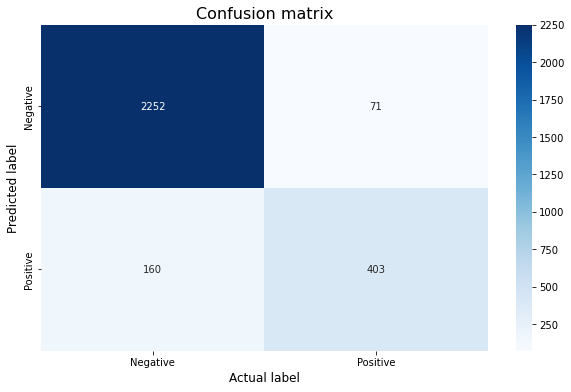

In [34]:
# plot confusion matrix 

cm= confusion_matrix(y_testset, prediction)
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative','Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

* No of occurances when the actual positive sentiment is predicted as positive = 403
* No of occurances when the actual negative sentiment is predicted as negative = 2252
* No of occurances when the actual negative sentiment is predicted as positive = 160
* No of occuraces when the actual positive sentiment is predicted as negative = 71

when the model makes the predictions using our test data, the confusion matrix measures the performance of the model.Precision, recall, accuracy and f1 score can be calculated using these values.

2. Classification Reports 

One of the performance metrics used in the classification-based machine learning models. This provides the metrics such as precision, recall, f1-score and the support.

* Precision: 
       
  The ratio of the true positives to the total of true and false positives is referred to as precision. Predicted positive and it’s true.<br><br>
  <i>Precision = TP/ (TP +FP)</i>
<br>
* Recall: 
       
  The ratio of the true positives to the total of true and false positives is referred to as precision. Predicted positive and it’s true.<br><br>
  <i>Recall = TP/ (TP + FN)</i>
<br>  
* F1 Score:

  The weighted harmonic mean of recall and precision is known as the F1. The projected performance of the model is higher when the F1 score value is near to 1.0.<br><br>
  <i>F1 Score: 2*(Precision*Recall) / (Precision + Recall)</i>
<br>  
* Support:

  The number of actual instances in the class of the dataset is called as support.
  
    

    
    


In [35]:
report = classification_report(y_testset, prediction)
print("Classification Report :\n -------------------\n",report)

Classification Report :
 -------------------
               precision    recall  f1-score   support

    negative       0.93      0.97      0.95      2323
    positive       0.85      0.72      0.78       563

    accuracy                           0.92      2886
   macro avg       0.89      0.84      0.86      2886
weighted avg       0.92      0.92      0.92      2886



According to the classification report, 
* The SVM Classifier provides us with the best accuracy score, with 92% precision scores.
* The f1-score for the negative tweets = 0.95 and f1-score for the positive tweets = 0.78
* The  recall values for the negative and positive tweets are 0.97 and 0.72 respectively.

# Part E - Evaluate Results

Let's discuss the results from this model.

This model predicts the sentiment value of the tweets as positive or negative using the test data


In [36]:
tweet = ["@VirginAmerica I'm disappointed that the agent at the designated silver status check in line @Dulles_Airport closed to assist all pasengers"]
input_tweet = vectorizer.transform(tweet)
predicted_output = model.predict(input_tweet)
print(predicted_output)

['negative']


The above tweet is a negative tweet. The built model predicts this tweet as negative. The predicted result is correct.

In [37]:
tweet = ["@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"]
input_tweet = vectorizer.transform(tweet)
predicted_output = model.predict(input_tweet)
print(predicted_output)


['negative']


The above tweet is a negative tweet. The built model predicts this tweet as negative. The predicted result is correct

In [38]:
tweet = ["@AmericanAir Flight 236 was great. Fantastic cabin crew. A+ landing. #thankyou #JFK"]
input_tweet = vectorizer.transform(tweet)
predicted_output = model.predict(input_tweet)
print(predicted_output)

['positive']


The built model predict this as positive. The result is correct.

In [39]:
tweet = ["@AmericanAir I love your company and your staff is amazing. They just made an uncomfortable situation comfortable"]
input_tweet = vectorizer.transform(tweet)
predicted_output = model.predict(input_tweet)
print(predicted_output)

['positive']


The built model predict this as positive. The result is correct.

In this built model,The SVM Classifier provides the best accuracy score, with 92% precision scores.
In order to increase the performance of the SVM model, hyper-parameters such as kernel is changed from "liner" to "rbf".
rdf = Radial basis function.


In [40]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(x_train_tfidf, y_trainset)

#predicting output for test data
prediction = model.predict(x_test_tfidf)

In [41]:
#accuracy score
accuracy_score(y_testset,prediction)

0.9123354123354124

There isn't a big change by this hyper-parameter tunning.So, the linear kernel is best for this problem.